This notebook contains all the code that generates the corresponding tables and figures in the paper

---



In [48]:
#Read Data Into Data Frames
# Train file int df_train
# Devel file into df_del
# Combined dataset into dataframe df.
import pandas as pd
fields=['id','segment_id', 'label_topic','aspect', 'opinion', 'sentiment']
df_train=pd.read_csv("../train.csv", usecols=fields)#replace with link to train.csv
df_train.columns


df_del=pd.read_csv('../devel.csv', usecols=['id','segment_id', 'label_topic','aspect', 'opinion', 'sentiment'])#replace with link to devel.csv
df_del.columns
df_del
df=pd.concat([df_train,df_del], axis=0)
display(df)

,id,segment_id,label_topic,aspect,opinion,sentiment
0,23.0,1.0,6.0,-,-,-
1,23.0,2.0,7.0,-,-,-
2,23.0,3.0,1.0,graphic,drawn on by the child,neg
3,23.0,3.0,1.0,cup holder (passenger),doesn't seem to operate that well,neg
4,23.0,4.0,2.0,slip differential,limited,neg
...,...,...,...,...,...,...
4294,303.0,14.0,6.0,car,everyday,pos
4295,303.0,14.0,6.0,pirce,big bucks,neg
4296,303.0,14.0,6.0,value,worth the big bucks,pos
4297,303.0,14.0,6.0,room,want a little bit more,neg


#Incorporate text columns from Muse-Car-ASTE

In [2]:
#ReadingMuseData
#Marrange the columns in muse data as this
fields=['id','segment_id', 'label_topic', 'text']
train=pd.read_csv("Final_Train_Muse.csv", usecols=fields) #give the muse train pathmake sure you have incorporated text columns
devel=pd.read_csv("Final_Devel_Muse.csv", usecols=fields) #give the muse devel path make sure you have incorporated text columns
muse=pd.concat([train,devel],axis=0)
muse=muse.drop_duplicates()
display(muse)

,id,segment_id,label_topic,text
0,23.0,1.0,6.0,"This is a BMW , a 60 M5 . It was introduced in..."
1,23.0,2.0,7.0,"This is a 2005 car , and it cost when you 86,0..."
2,23.0,3.0,1.0,Thesixty M5 was only available with an automat...
4,23.0,4.0,2.0,As with the case of them cars . It has a reall...
5,23.0,5.0,4.0,Extinct traction handy when you got over 500 h...
...,...,...,...,...
4287,303.0,10.0,6.0,So which vehicles compete with the 2012 BMW S6...
4288,303.0,11.0,7.0,"It could easily go over $105,000 ."
4289,303.0,12.0,0.0,"If you want great fuel economy , you better of..."
4290,303.0,13.0,7.0,The 2012 BMW 6 50 i coop offers a boatload of ...


Table1: Characteristics of the Dataset

In [4]:
total_triples=len(df)
print("total triples ->", total_triples)
segments=len(muse["segment_id"])
print("segments ->", segments)
num_videos=muse["id"].max()
print("No. of Videos ->", num_videos)
num_sentences=len(''.join(muse["text"]).split('.'))
print("No. of Sentences (AFTER REMOVING DUPLICATES)  ->", num_sentences)
print("(Originally 28,295 as reported in Muse paper)")
num_topics=df['label_topic'].nunique()
print("num_topics ->", num_topics)
empty_triples=df.loc[(df['aspect']=='-') & (df['opinion']=='-') & (df['sentiment']=='-')]
print("empty_triples ->", len(empty_triples))
non_empty_triples=df.loc[(df['aspect']!='-') & (df['opinion']!='-') & (df['sentiment']!='-')]
print("non-empty_triples ->", len(non_empty_triples))
total_non_empty_aspects=len(non_empty_triples["aspect"])
print("total non_empty aspects", total_non_empty_aspects)
total_non_empty_opinion=len(non_empty_triples["opinion"])
print("total non_empty opinion", total_non_empty_opinion)
unique_aspect=non_empty_triples['aspect'].nunique()
print("unique aspect", unique_aspect)
unique_opinion=non_empty_triples['opinion'].nunique()
print("unique opinion", unique_opinion)

total triples -> 15609
segments -> 5507
No. of Videos -> 303.0
No. of Sentences (AFTER REMOVING DUPLICATES)  -> 22876
(Originally 28,295 as reported in Muse paper)
num_topics -> 10
empty_triples -> 1442
non-empty_triples -> 14167
total non_empty aspects 14167
total non_empty opinion 14167
unique aspect 3048
unique opinion 7875


Table 2: Dataset sizes and class distribution over training and validation

In [ ]:
print("<------------------------Training Set---------------------------->")
segments=train['text'].nunique()
triples=len(df_train)
empty_triples=df_train.loc[(df_train['aspect']=='-') & (df_train['opinion']=='-') & (df_train['sentiment']=='-')]
non_empty_triples=df_train.loc[(df_train['aspect']!='-') & (df_train['opinion']!='-') & (df_train['sentiment']!='-')]
positive=len(non_empty_triples.loc[non_empty_triples['sentiment']=='pos'])
negative=len(non_empty_triples.loc[non_empty_triples['sentiment']=='neg'])
neutral=len(non_empty_triples.loc[non_empty_triples['sentiment']=='neu'])

print("segments-->", segments)
print("No of triples--->", triples)
print("empty triples-->", len(empty_triples))
print("Non-empty triples-->", len(non_empty_triples))
print("positive-->",positive)
print("negative-->",negative)
print("neutral-->", neutral)

print("<------------------------Development Set---------------------------->")
segments=devel['text'].nunique()
triples=len(df_del)
empty_triples=df_del.loc[(df_del['aspect']=='-') & (df_del['opinion']=='-') & (df_del['sentiment']=='-')]
non_empty_triples=df_del.loc[(df_del['aspect']!='-') & (df_del['opinion']!='-') & (df_del['sentiment']!='-')]
positive=len(non_empty_triples.loc[non_empty_triples['sentiment']=='pos'])
negative=len(non_empty_triples.loc[non_empty_triples['sentiment']=='neg'])
neutral=len(non_empty_triples.loc[non_empty_triples['sentiment']=='neu'])

print("segments-->", segments)
print("No of triples--->", triples)
print("empty triples-->", len(empty_triples))
print("Non-empty triples-->", len(non_empty_triples))
print("positive-->",positive)
print("negative-->",negative)
print("neutral-->", neutral)


<------------------------Training Set---------------------------->
segments--> 4189
No of triples---> 11310
empty triples--> 1206
Non-empty triples--> 10104
positive--> 6519
negative--> 1793
neutral--> 1792
<------------------------Development Set---------------------------->
segments--> 1313
No of triples---> 4299
empty triples--> 236
Non-empty triples--> 4063
positive--> 2813
negative--> 469
neutral--> 781


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Table 5: Final Data Distribution on Sentiment

In [6]:
segments=train['text'].nunique()
print("segments-->", segments)
empty_triples=df.loc[(df['aspect']=='-') & (df['opinion']=='-') & (df['sentiment']=='-')]
print("empty_triples ->", len(empty_triples))
non_empty_triples=df.loc[(df['aspect']!='-') & (df['opinion']!='-') & (df['sentiment']!='-')]
print("non-empty-triples-->", len(non_empty_triples))

segments--> 4189
empty_triples -> 1442
non-empty-triples--> 14167


Fig.2. Percentage distribution of triples and segments based on yielding subjective information.

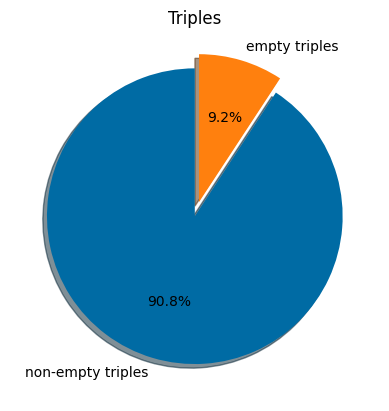

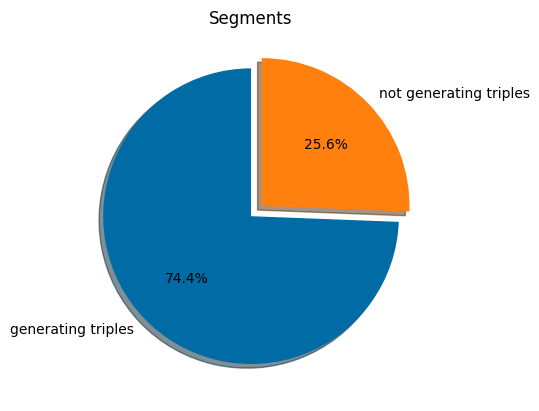

In [ ]:
labels = ['non-empty triples', 'empty triples']
sizes = [len(non_empty_triples),len(empty_triples)]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
fig.set_facecolor('white')
plt.title('Triples')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

labels = ['generating triples', 'not generating triples']
sizes = [segments,len(empty_triples)]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
fig.set_facecolor('white')
plt.title('Segments')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

Triple Analysis

In [8]:
triples=df.iloc[:,3:]
triples

,aspect,opinion,sentiment
0,-,-,-
1,-,-,-
2,graphic,drawn on by the child,neg
3,cup holder (passenger),doesn't seem to operate that well,neg
4,slip differential,limited,neg
...,...,...,...
4294,car,everyday,pos
4295,pirce,big bucks,neg
4296,value,worth the big bucks,pos
4297,room,want a little bit more,neg


Fig.3. Percentage distribution of non-empty triples based on sentiment Class.

In [15]:
triples.groupby('sentiment').count()['aspect']

sentiment
-      1442
neg    2262
neu    2573
pos    9332
Name: aspect, dtype: int64

In [14]:
size=list(triples.groupby('sentiment').count()['aspect'])
size=size[1:] #ignoring empty triples
size

[2262, 2573, 9332]

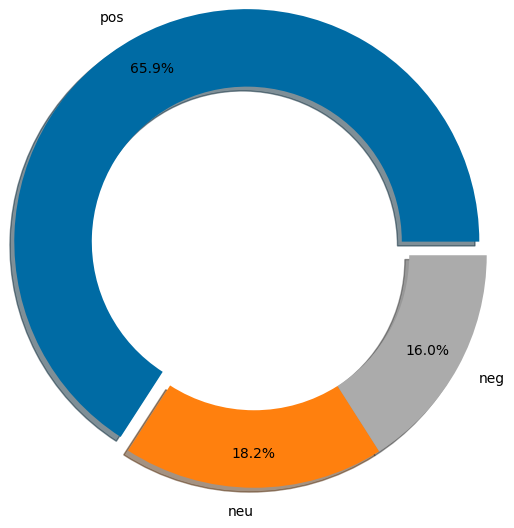

In [16]:
plt.figure(figsize=(5,6))
location = ['pos', 'neu','neg']
Confirmed_cases = [9332, 2573, 2262]

plt.style.use('tableau-colorblind10')
plt.axis('equal')

plt.pie(Confirmed_cases, labels= location, explode=[0.1,0,0],radius= 1.5, autopct= '%2.1f%%', pctdistance = 0.85,
        shadow = True, labeldistance= 1.1, counterclock= True, wedgeprops={'width': 0.5})
plt.title("")
plt.show()

TEXT LENGTH

In [17]:
muse['Text_length'] = muse.text.str.split().str.len()
muse['Text_length'].describe()

count    5507.000000
mean       64.797167
std        71.407113
min         1.000000
25%        22.000000
50%        43.000000
75%        81.000000
max      1480.000000
Name: Text_length, dtype: float64

In [18]:
df['Aspect_length'] = df.aspect.str.split().str.len()
df['Opinion_length'] = df.opinion.str.split().str.len()

In [19]:
df['Aspect_length'].describe()

count    15609.000000
mean         1.414248
std          0.724094
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Aspect_length, dtype: float64

In [20]:
df['Opinion_length'].describe()

count    15609.000000
mean         2.110449
std          1.461438
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: Opinion_length, dtype: float64

In [21]:
!pip install plotly-express

Fig,4. Box plot of data points based on length (number of tokens) per segment

In [22]:
import pandas as pd
import plotly.express as px

In [23]:
fig = px.box(df, y= muse['Text_length'], notched= True, points= 'all')
fig.show()

Fig.5. Box plots of aspect and opinion lengths (number of tokens).

{'whiskers': [<matplotlib.lines.Line2D at 0x7946f83153f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7946f8315930>,
 'boxes': [<matplotlib.lines.Line2D at 0x7946f8315150>],
 'medians': [<matplotlib.lines.Line2D at 0x7946f8315e70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7946f83163b0>],
 'means': [<matplotlib.lines.Line2D at 0x7946f8316110>]}

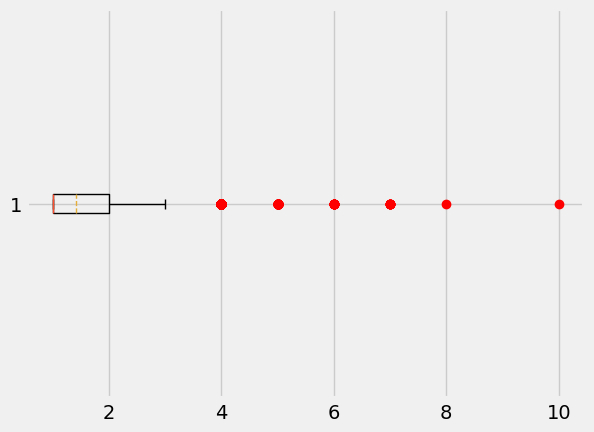

In [ ]:
plt.style.use('fivethirtyeight')

plt.boxplot(df['Aspect_length'], widths=0.05 ,showmeans= True, showcaps= True, sym= 'r', whis= 1.5, vert= False, meanline= True)

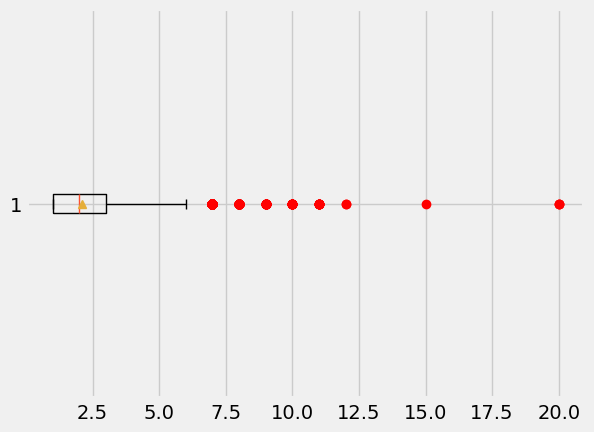

In [ ]:
plt.boxplot(df['Opinion_length'], widths=0.05 ,showmeans= True, showcaps= True, sym= 'r', whis= 1.5, vert= False, meanline= False)
plt.show()

TOPIC-WISE ANALYSIS

In [ ]:
!pip install seaborn

In [ ]:
topic_numbers=list(df.groupby('label_topic').count()['id'])
print("topic_numbers",topic_numbers)
segments=muse.drop_duplicates()
segment_numbers=list(segments.groupby('label_topic').count()['id'])
print("segment_numbers",segment_numbers)
empty=df.loc[df["sentiment"]=='-']
topic_empty_triples=list(empty.groupby('label_topic').count()['id'])
print("topic_empty_triples",topic_empty_triples)
non_empty=df.loc[df["sentiment"]!='-']
topic_non_empty_triples=list(non_empty.groupby('label_topic').count()['id'])
print("topic_non_empty_triples",topic_non_empty_triples)

topic_numbers [2241, 1336, 2130, 1660, 3002, 342, 1998, 583, 842, 1475]
segment_numbers [830, 523, 570, 497, 787, 149, 1022, 389, 238, 502]
topic_empty_triples [185, 127, 60, 87, 122, 39, 450, 185, 50, 137]
topic_non_empty_triples [2056, 1209, 2070, 1573, 2880, 303, 1548, 398, 792, 1338]


In [ ]:
topicnames=['performance',
'interior-features',
'quality-aeshetic',
'comfort',
'handling',
'safety',
'general-information',
'cost',
'user-experience',
'exterior-features']

Fig.6.Percentage distribution of triples generated per topic (category).

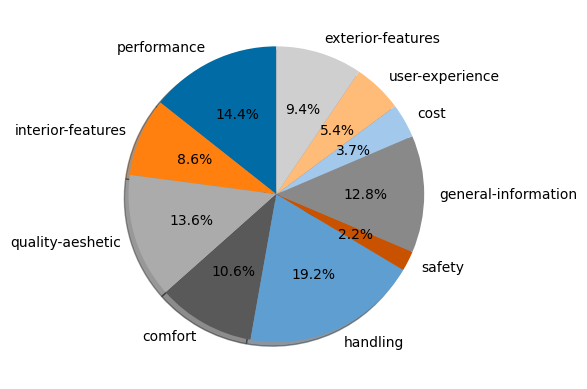

In [ ]:
import seaborn as sns


fig, ax = plt.subplots()
ax.pie(topic_numbers, labels=topicnames, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

Fig.7.Bar plot of number of review segments vis-à-vis number of empty and non-empty triples generated per topic.

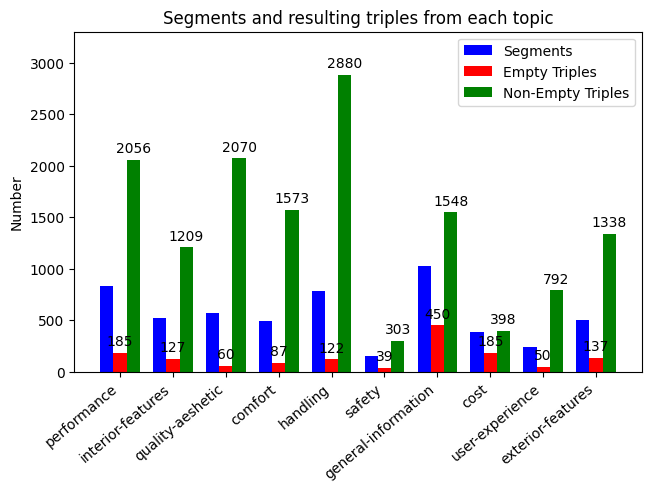

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

topicnames=('performance',
'interior-features',
'quality-aeshetic',
'comfort',
'handling',
'safety',
'general-information',
'cost',
'user-experience',
'exterior-features')
topicnumbers = {
    'Segments': tuple(segment_numbers),
    'Empty Triples': tuple(topic_empty_triples),
    'Non-Empty Triples': tuple(topic_non_empty_triples)
}

x = np.arange(len(topicnames))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color=['b', 'r','g']
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in topicnumbers.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color[multiplier])
    if multiplier>0:
      ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Segments and resulting triples from each topic')
ax.set_ylabel('Number')

ax.set_xticks(x + width, topicnames)
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
ax.legend(loc='upper right')
ax.set_ylim(0, 3300)

plt.show()

STATISTICAL ANALYSIS OF ANNOTATION

Fig.9. Percentage Distribution of single and multi-word aspects and opinions in the dataset.

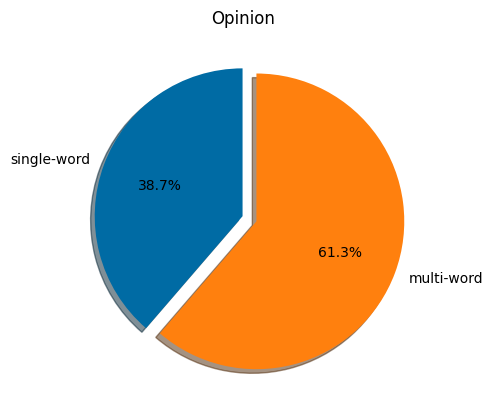

In [29]:
triples=df.loc[df['sentiment']!='-'] #get the rows with non-empty triples
multi_word_opinion=len(triples.loc[(triples['Opinion_length']>1)])
single_word_opinion=len(triples.loc[(triples['Opinion_length']==1)])
labels = ['single-word', 'multi-word']

sizes=[single_word_opinion,multi_word_opinion]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
plt.title('Opinion')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

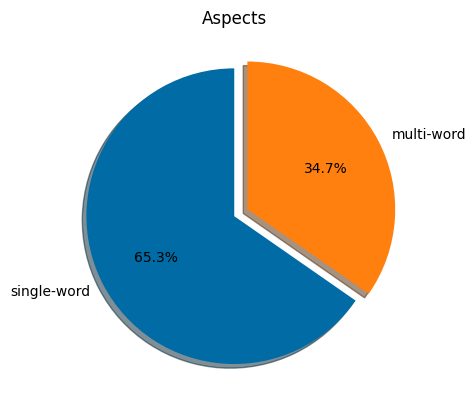

In [30]:
triples=df.loc[df['sentiment']!='-'] #get the rows with non-empty triples
multi_word_aspect=len(triples.loc[(triples['Aspect_length']>1)])
single_word_aspect=len(triples.loc[(triples['Aspect_length']==1)])
labels = ['single-word', 'multi-word']

sizes=[single_word_aspect,multi_word_aspect]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
plt.title('Aspects')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

WORDCLOUD

In [32]:
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 6731, done.
remote: Counting objects: 100% (1001/1001), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 6731 (delta 849), reused 856 (delta 798), pack-reused 5730
Receiving objects: 100% (6731/6731), 117.00 MiB | 29.65 MiB/s, done.
Resolving deltas: 100% (3995/3995), done.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [33]:
!pip install pillow

In [37]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Fig10. Word Cloud of top-100 most frequent aspects in the dataset.

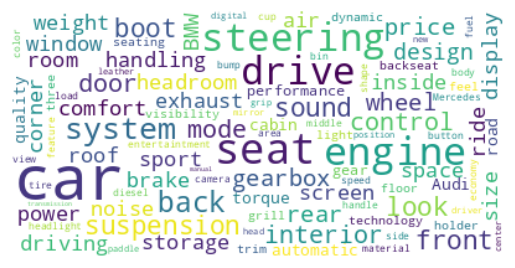

In [39]:
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords=set(STOPWORDS)
aspects=' '.join(triples.aspect)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False, stopwords=stopwords).generate(aspects)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Fig11. Word Cloud of top-100 most frequent opinions in the dataset.

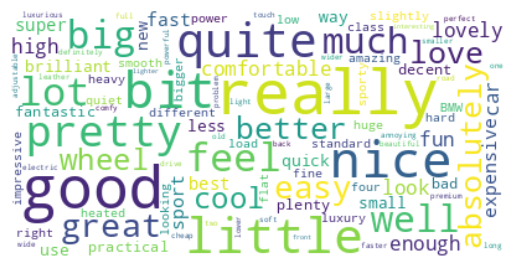

In [41]:
opinions=', '.join(triples.opinion)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False, stopwords=stopwords).generate(opinions)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
topicnames=['performance',
'interior-features',
'quality-aeshetic',
'comfort',
'handling',
'safety',
'general-information',
'cost',
'user-experience',
'exterior-features']

Table 10: Top-k most frequent aspects extracted per topic class in the dataset. (k=15)

In [51]:
k=15
for topic in range(0,10,1):
  triples=df.loc[df['sentiment']!='-']#get all rows with non-empty triples
  triples=triples.loc[triples["label_topic"]==topic]

  x= triples.groupby('aspect').size()
  d = dict(x)
  d = sorted(d.items(), key=lambda x:x[1], reverse=True)
  print(topicnames[topic])
  print(dict(d[:k]))

performance
{'engine': 329, 'car': 212, 'sound': 95, 'drive': 75, 'power': 59, 'torque': 53, 'exhaust': 33, 'performance': 33, 'gearbox': 24, '0 to 60 time': 22, 'fuel economy': 21, 'noise': 21, 'mpg': 20, 'weight': 20, 'acceleration': 18}
interior-features
{'steering': 49, 'car': 46, 'door bins': 42, 'seats': 39, 'cup holders': 32, 'steering wheel': 26, 'storage': 25, 'screen': 21, 'display': 19, 'cup holder': 17, 'glove box': 17, 'gearbox': 13, 'entertaintment system': 11, 'front seats': 11, 'rear seats': 11}
quality-aeshetic
{'car': 216, 'looks': 117, 'interior': 110, 'design': 83, 'look': 44, 'inside': 42, 'materials': 39, 'steering': 37, 'grill': 35, 'back': 29, 'quality': 29, 'color': 27, 'cabin': 22, 'trim': 22, 'front': 20}
comfort
{'seats': 95, 'car': 90, 'headroom': 64, 'back': 57, 'front seats': 45, 'seat': 39, 'middle seat': 33, 'back seat': 29, 'sound': 29, 'room': 28, 'back seats': 23, 'backseat': 23, 'seating': 23, 'inside': 20, 'knee room': 20}
handling
{'car': 373, 'st

Table 11 Top-k most frequently annotated opinions per sentiment class in the dataset (k=15).

In [46]:
k=15
sentiment=['pos','neg','neu']
for sent in sentiment:
  triples=df.loc[df['sentiment']!='-']#get all rows with non-empty triples
  triples=triples.loc[triples["sentiment"]==sent]

  x=count = triples.groupby('opinion').size()
  d = dict(x)
  d = sorted(d.items(), key=lambda x:x[1], reverse=True)
  print(sent)
  print(dict(d[:k]))

pos
{'nice': 171, 'good': 136, 'love': 120, 'lovely': 91, 'great': 87, 'like': 87, 'big': 76, 'really good': 64, 'better': 52, 'brilliant': 52, 'pretty good': 51, 'heated': 50, 'fantastic': 49, 'amazing': 46, 'really nice': 44}
neg
{'annoying': 35, 'little': 26, 'fake': 22, 'problem': 20, 'not great': 19, 'small': 15, 'not like': 11, 'cheap': 8, 'little bit': 8, 'none': 8, 'shame': 8, 'smaller': 8, 'lot of money': 7, 'heavy': 6, 'not so great': 6}
neu
{'all wheel': 53, 'big': 41, 'little': 35, 'standard': 34, 'electric': 22, 'four wheel': 20, 'small': 19, 'all right': 18, 'automatic': 18, 'heavy': 18, 'okay': 18, 'decent': 17, 'SUV': 15, 'lower': 15, 'not bad': 15}
